# **Training Neural Network on MNIST Hand-Written Number Dataset**

In [ ]:
import os
import keras
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

## **Data**

### **Read Data**

In [2]:
train = pd.read_csv("./mnist_num_dataset/mnist_train.csv")
test = pd.read_csv("./mnist_num_dataset/mnist_test.csv")

In [3]:
print(f"Shape of training set {train.shape}")
print(f"Shape of testing set {test.shape}")

Shape of training set (59999, 785)
Shape of testing set (9999, 785)


### **Splitting Data**

In [4]:
x_train = train.drop('5', axis=1).values
y_train = train['5'].values

x_test = test.drop('7', axis=1).values
y_test = test['7'].values

### **Preprocessing**

In [5]:
x_train,x_test = x_train.reshape(-1, 28*28),x_test.reshape(-1, 28*28)
x_train = x_train/255
x_test = x_test/255
y_train,y_test = tf.one_hot(y_train,10),tf.one_hot(y_test,10)

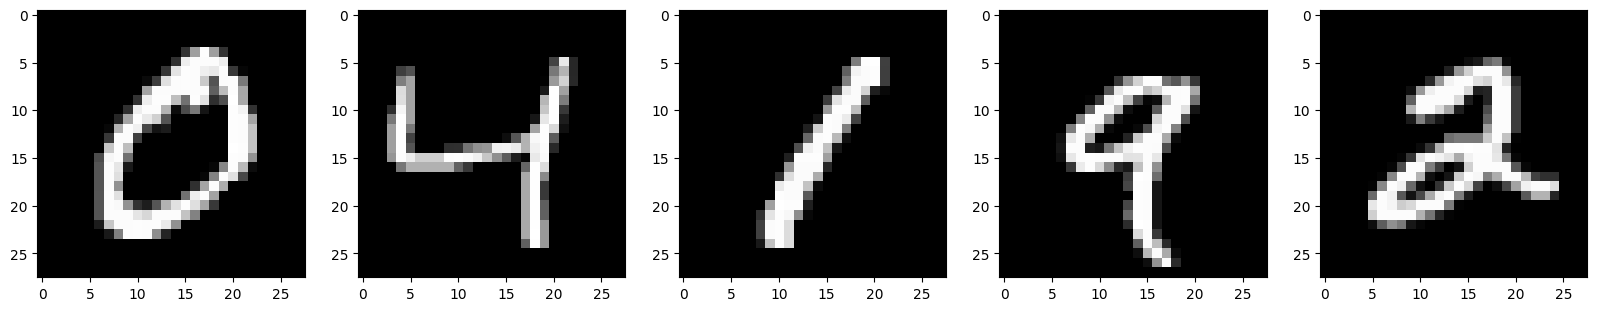

In [6]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
plt.show()

## **Model**

In [7]:
model =  tf.keras.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### **Train Model**

In [9]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['CategoricalAccuracy'])
train_history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_split=0.1,
                          callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy',
                                                                    mode='max', patience=3, restore_best_weights=True))

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - CategoricalAccuracy: 0.9744 - loss: 0.0844 - val_CategoricalAccuracy: 0.9742 - val_loss: 0.0907
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - CategoricalAccuracy: 0.9814 - loss: 0.0610 - val_CategoricalAccuracy: 0.9775 - val_loss: 0.0824
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - CategoricalAccuracy: 0.9854 - loss: 0.0470 - val_CategoricalAccuracy: 0.9785 - val_loss: 0.0760
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - CategoricalAccuracy: 0.9879 - loss: 0.0377 - val_CategoricalAccuracy: 0.9773 - val_loss: 0.0738
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - CategoricalAccuracy: 0.9906 - loss: 0.0304 - val_CategoricalAccuracy: 0.9805 - val_loss: 0.0742
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - CategoricalAccuracy: 0.9931 - loss: 0.0240 - val_CategoricalAccuracy: 0.9797 - val_loss: 0.0803
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - CategoricalAccuracy: 0.99

In [ ]:
model.save('mnist_model.keras')

### **Training History**

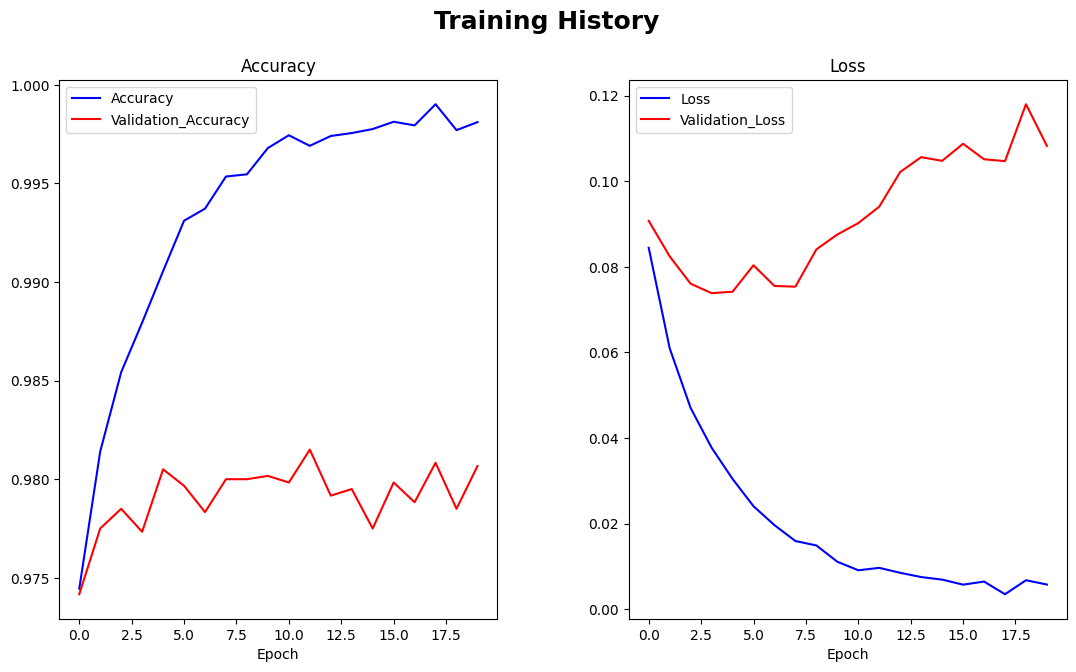

In [43]:
accuracy, validation_accuracy = train_history.history['CategoricalAccuracy'],train_history.history['val_CategoricalAccuracy']
loss, validation_loss = train_history.history['loss'],train_history.history['val_loss']

fig,ax = plt.subplots(1, 2, figsize=(13,7))
ax[0].plot(accuracy, c='b', label='Accuracy')
ax[0].plot(validation_accuracy, c='r', label="Validation_Accuracy")
ax[0].legend(loc='best')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epoch')

ax[1].plot(loss, c='b', label='Loss')
ax[1].plot(validation_loss, c='r', label="Validation_Loss")
ax[1].legend(loc='best')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')

plt.subplots_adjust(wspace=0.3)
fig.suptitle("Training History", fontsize=18, fontweight='bold')
plt.show()

In [ ]:
trained_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - CategoricalAccuracy: 0.9797 - loss: 0.1067


[0.10671277344226837, 0.9796979427337646]

### **Prediction on Testing Data**

In [ ]:
y_prediction = trained_model.predict(x_test)

for i in range(5):
    print(f"Predicted value : {np.argmax(y_prediction[i])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted value : 2
Predicted value : 1
Predicted value : 0
Predicted value : 4
Predicted value : 1


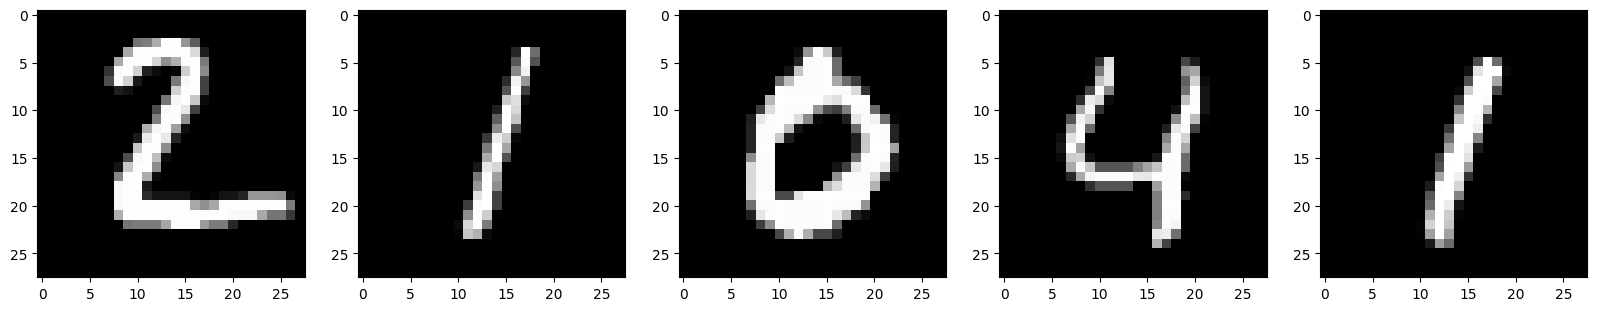

In [52]:
fig,ax = plt.subplots(1, 5, figsize=(20,20))
for i in range(5):
    ax[i].imshow(x_test[i].reshape(28,28), cmap='gray')